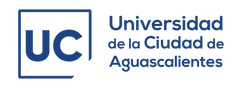

# **METODOS NUMERICOS II**
## **Examen primer parcial**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

Para esta actividad el escenario es el siguiente, se le proporcionará un data set con datos demográficos, en el cual usted como analista de datos, tendrá que realizar algunas exploraciones haciendo uso de la herramienta de Python en Google Colab para resolverlo. 

Una vez concluido subir su examen en el apartado indicado (Deadline viernes 1 de septiembre a la media noche), el día sábado 2 de septiembre se realizará una revisión en donde usted explicara al profesor los insighs encontrados durante su análisis, y cuáles y como fueron las herramientas que uso.

Para realizar su análisis en Python, hacer uso de las siguientes herramientas estadísticas:

* 10% Calcular Frecuencia y porcentajes de variables categóricas
* 10% Calcular Frecuencia y porcentajes de variables cualitativas
* 10% Usar la función de pandas crosstab
* 20% Realizar al menos 2 gráficos de distribución normal
* 20% Realizar al menos 2 gráficos de barras.
* 30% Agregar una conclusión de al menos 2 párrafos.

### Exploración inicial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("s04_data.csv")
print(df.shape)
df.head()


(195, 5)


,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


Explorar los tipos de datos

In [3]:
df.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

Identificar renglones únicos y repetidos

In [4]:
df.nunique()

Country Name      195
Country Code      195
Birth rate        177
Internet users    181
Income Group        4
dtype: int64

### Distribución de valores en income group

In [5]:
freq_income = df["Income Group"].value_counts()
freq_income

High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: Income Group, dtype: int64

In [6]:
percen_income = df["Income Group"].value_counts(normalize=True)  *100
percen_income

High income            34.358974
Lower middle income    25.641026
Upper middle income    24.615385
Low income             15.384615
Name: Income Group, dtype: float64

In [7]:
distrib_income = pd.DataFrame({"Frec": freq_income, "Porcent": percen_income});
distrib_income

,Frec,Porcent
High income,67,34.358974
Lower middle income,50,25.641026
Upper middle income,48,24.615385
Low income,30,15.384615


### Distribución de valores en internet users

#### Regla de Sturges
$$ k = 1 + \frac{10}{3} \log_{10}n$$

In [8]:
n = df.shape[0] #Rows
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

9

In [9]:
freq_internet_u = pd.value_counts(
    pd.cut(
        x = df["Internet users"],
        bins = k,
        include_lowest = True
    ),
    sort = False
)
freq_internet_u

(0.803, 11.527]     42
(11.527, 22.155]    25
(22.155, 32.782]    12
(32.782, 43.41]     21
(43.41, 54.037]     22
(54.037, 64.665]    18
(64.665, 75.292]    25
(75.292, 85.919]    16
(85.919, 96.547]    14
Name: Internet users, dtype: int64

In [10]:
percent_internet_u = pd.value_counts(
    pd.cut(
        x = df["Internet users"],
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
) * 100
percent_internet_u

(0.803, 11.527]     21.538462
(11.527, 22.155]    12.820513
(22.155, 32.782]     6.153846
(32.782, 43.41]     10.769231
(43.41, 54.037]     11.282051
(54.037, 64.665]     9.230769
(64.665, 75.292]    12.820513
(75.292, 85.919]     8.205128
(85.919, 96.547]     7.179487
Name: Internet users, dtype: float64

In [11]:
distr_internet_u = pd.DataFrame({"Frec": freq_internet_u, "Porcent": percent_internet_u})
distr_internet_u

,Frec,Porcent
"(0.803, 11.527]",42,21.538462
"(11.527, 22.155]",25,12.820513
"(22.155, 32.782]",12,6.153846
"(32.782, 43.41]",21,10.769231
"(43.41, 54.037]",22,11.282051
"(54.037, 64.665]",18,9.230769
"(64.665, 75.292]",25,12.820513
"(75.292, 85.919]",16,8.205128
"(85.919, 96.547]",14,7.179487


### Cruce de variables income group y birth rate (redondeado)
Debido a que crosstab funciona mejor con variables categoricas, decidí apicar una discretización a  birth rates, agrupando un poco los valores pero manteniendo el tamaño original del dataset.

In [12]:
# Discretizar birth_rates
rounded_birth_rates = round(df["Birth rate"], -1) 

dist_income_birth = pd.crosstab(rounded_birth_rates, df["Income Group"])

income_order = ["High income", "Upper middle income", "Lower middle income", "Low income"]
dist_income_birth = dist_income_birth.reindex(income_order, axis="columns")
dist_income_birth

Income Group,High income,Upper middle income,Lower middle income,Low income
Birth rate,,,,
10.0,51,15,4,0
20.0,15,26,18,2
30.0,0,6,20,7
40.0,1,0,8,19
50.0,0,1,0,2


In [13]:
rounded_internet_u = round(df["Internet users"], -1)

dist_income_internet = pd.crosstab(rounded_internet_u, df["Income Group"])

dist_income_internet = dist_income_internet.reindex(income_order, axis="columns")
dist_income_internet

Income Group,High income,Upper middle income,Lower middle income,Low income
Internet users,,,,
0.0,0,0,3,17
10.0,0,4,15,11
20.0,1,5,14,2
30.0,0,4,4,0
40.0,0,14,12,0
50.0,3,14,1,0
60.0,11,4,1,0
70.0,21,3,0,0
80.0,15,0,0,0


### Gáficos


Gráfica de distribución de frecuencias sobre usuarios de internet

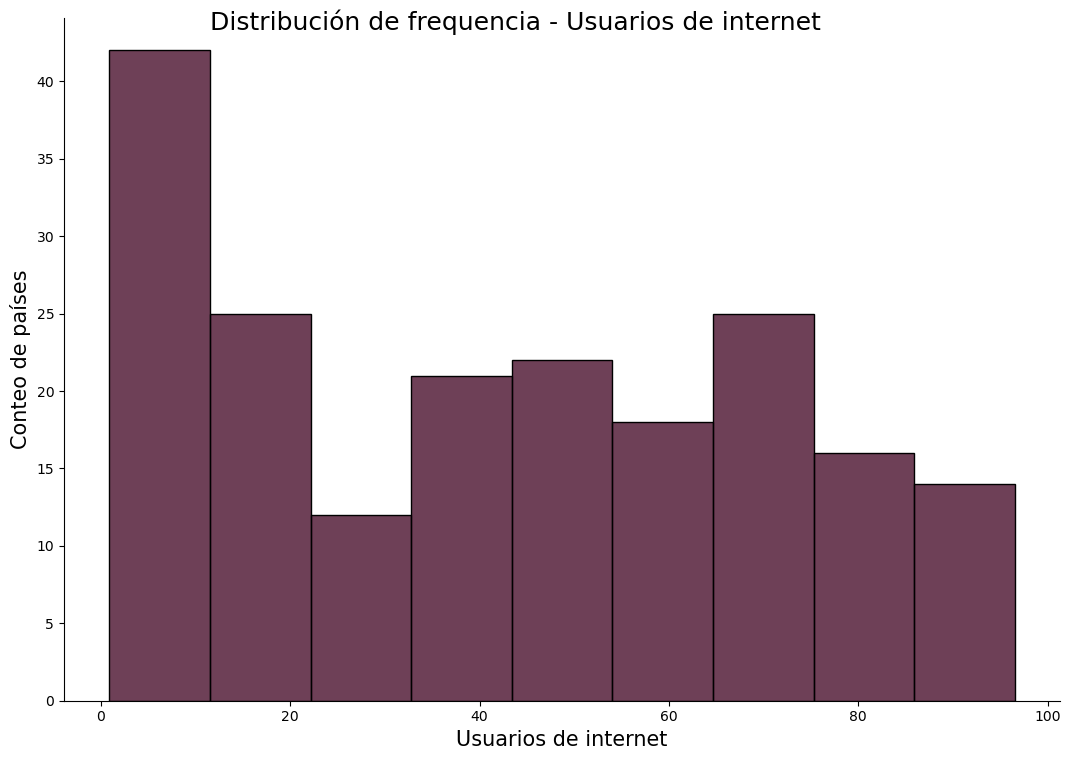

In [14]:
ax = sns.displot(df["Internet users"], kde=False, color="#3E001F")
ax.figure.set_size_inches(12,8)
ax.fig.suptitle("Distribución de frequencia - Usuarios de internet", fontsize=18)
ax.set_xlabels("Usuarios de internet", fontsize=15)
ax.set_ylabels("Conteo de países", fontsize=15)

Gráfica de distribución de frecuencias de tasas de nacimiento

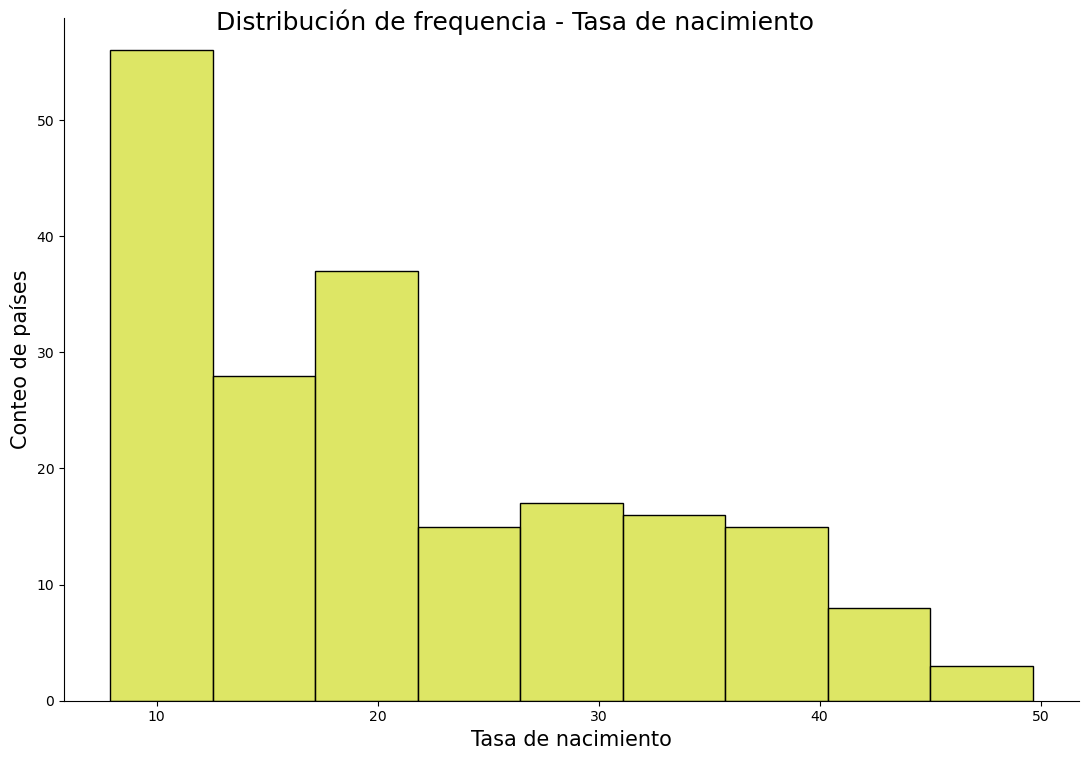

In [15]:
ax = sns.displot(df["Birth rate"], kde=False, color="#D2DE32")
ax.figure.set_size_inches(12,8)
ax.fig.suptitle("Distribución de frequencia - Tasa de nacimiento", fontsize=18)
ax.set_xlabels("Tasa de nacimiento", fontsize=15)
ax.set_ylabels("Conteo de países", fontsize=15)

Gráfica de distribución de frecuencias de ingresos por pais

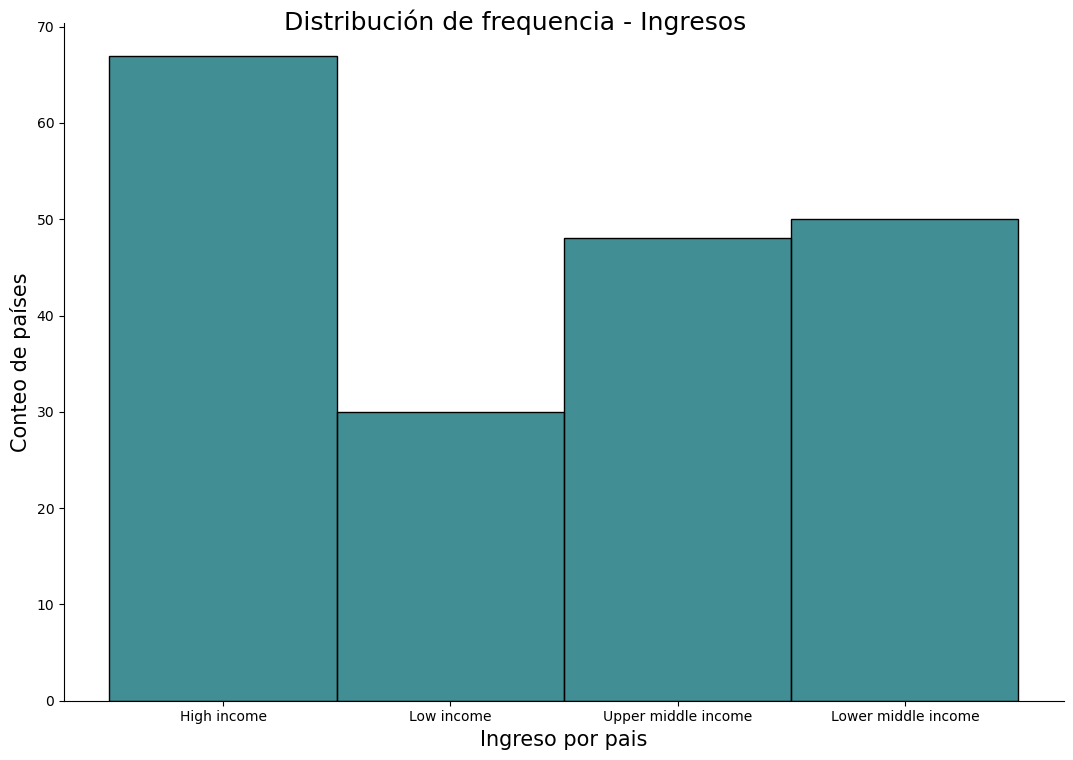

In [16]:
ax = sns.displot(df["Income Group"], kde=False, color="#016A70")
ax.figure.set_size_inches(12,8)
ax.fig.suptitle("Distribución de frequencia - Ingresos", fontsize=18)
ax.set_xlabels("Ingreso por pais", fontsize=15)
ax.set_ylabels("Conteo de países", fontsize=15)

<AxesSubplot: title={'center': 'Distribución de frequencia - Usuarios de internet'}, xlabel='Rangos de usuarios de internet', ylabel='Conteo de países'>

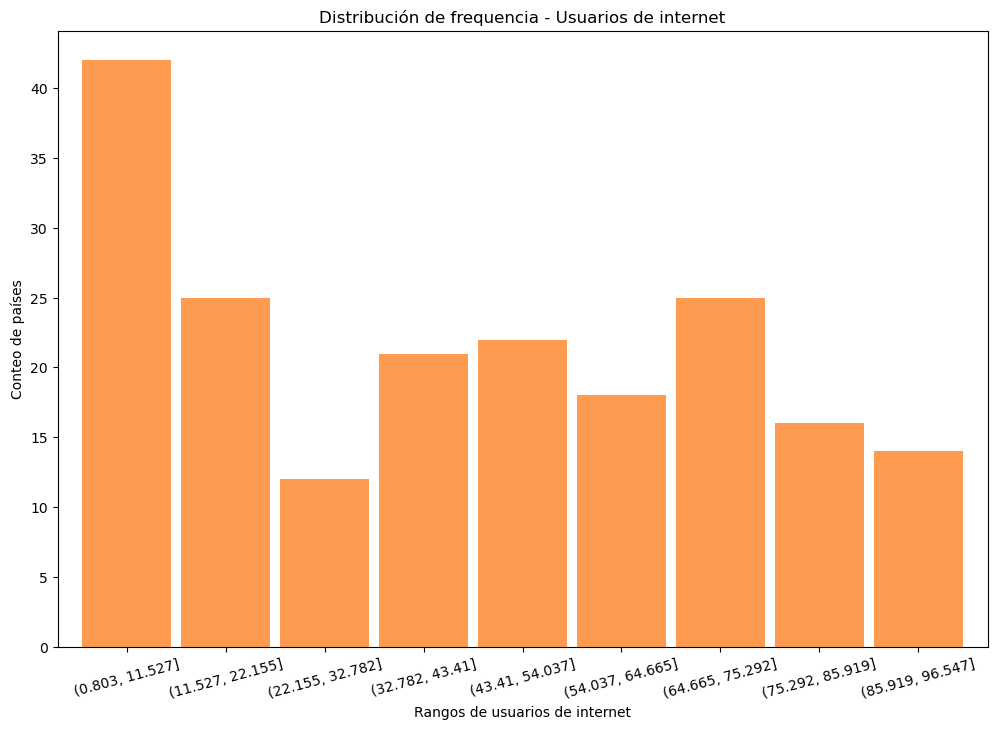

In [17]:
distr_internet_u["Frec"].plot.bar(
    width=0.9, 
    figsize=(12,8), 
    color="#FF9B50", 
    title="Distribución de frequencia - Usuarios de internet",
    xlabel="Rangos de usuarios de internet",
    ylabel="Conteo de países",
    rot=15
)

## Conclusiones


El haber agrupado (redondeando) algunas variables numéricas para generar los crosstabs fue de gran utilidad para contrastar el desempeño y tendencias de países con alto ingreso a aquellos con bajo ingreso, mostrando tendencias opuestas respecto a tasa de nacimiento (en descenso a mayor ingreso tengan los países) y cantidad de usuarios en internet (en descenso a menor ingreso tengan los países). Lo cuál hace sentido, respecto a usuarios de internet, internet es mayoritariamente un servicio de paga, y para emplearlo es necesario contar con infraestructura apropiada, y la población tener acceso a dispositivos que puedan conectarse. Respecto a la tasa de nacimiento, es una tendencia que se ha visto, mientras que países tercermundistas sufren de sobrepoblación (India, Nigeria…), países primermundistas sufren lo contrario (Italia, Japón), este tipo de tendencias creo que invitan a investigaciones más profundas específicas de estas tendencias para entender sus causas, y contextos.      

Finalmente, con las gráficas es posible analizar la distribución de comportamientos, por ejemplo en la gráfica de distribución de usuarios, es sencillo notar que la mayoría de los países, aunque sean del espectro de ingresos bajos, tienen usuarios de internet; por otra parte respecto a nacimientos, en realidad ningún país ha detenido sus nacimientos, por ello, aunque sea poco, siguen naciendo nuevas generaciones.
